### Data Description

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

#### Attribute Information

- All the features are geometric features extracted from the silhouette.
- All are numeric in nature.

### Import the necessary libraries

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder # Label encoder 

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import skew
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.model_selection import KFold

### Loading the datase

In [211]:
data = pd.read_csv('vehicle.csv')
data.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

### EDA

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- The dataset is of shape (846 rows,19 columns)
- All fields are numeric except class. No need to convert data types.
- There are missing values in circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 columns.

In [213]:
data.isnull().sum() # checking columns which has missing values with missing data count per column

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

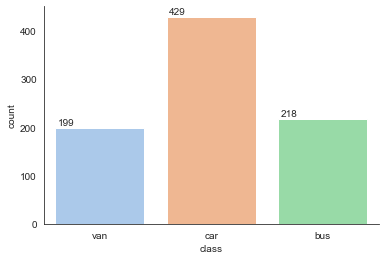

In [214]:
ax = sns.countplot(x="class", data=data, palette="pastel")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5), ha='center')
    
plt.show()

Car count is greater in number compare to the Van and Bus count. Van count is least in number.

#### Label encode the target class

In [215]:
labelencoder = LabelEncoder()
data['class'] = labelencoder.fit_transform(data['class'])
data['class'].value_counts() 

1    429
0    218
2    199
Name: class, dtype: int64

- 0: Bus
- 1: Car
- 2: Van

In [216]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

In [217]:
# dropping rows which has more than 1 null value
null_values_indexs = []
for i in range(len(data.index)) :
    if data.iloc[i].isnull().sum() > 1 :
        print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())
        null_values_indexs.append(i)
        
print(f'\nDroping rows: {null_values_indexs}')

data.drop(null_values_indexs, inplace=True)

Nan in row  66  :  2
Nan in row  105  :  3
Nan in row  118  :  2
Nan in row  207  :  2
Nan in row  222  :  2
Nan in row  249  :  2
Nan in row  266  :  2

Droping rows: [66, 105, 118, 207, 222, 249, 266]


#### Handling of missing values 

In [218]:
# replacing missing values in median of respective column.
for col in data.columns:
    data[col].fillna(value= data[col].median(), inplace = True)

In [219]:
data.isnull().sum() # checking columns which has missing values with missing data count per column

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 

#### Univariate analysis of each attribute

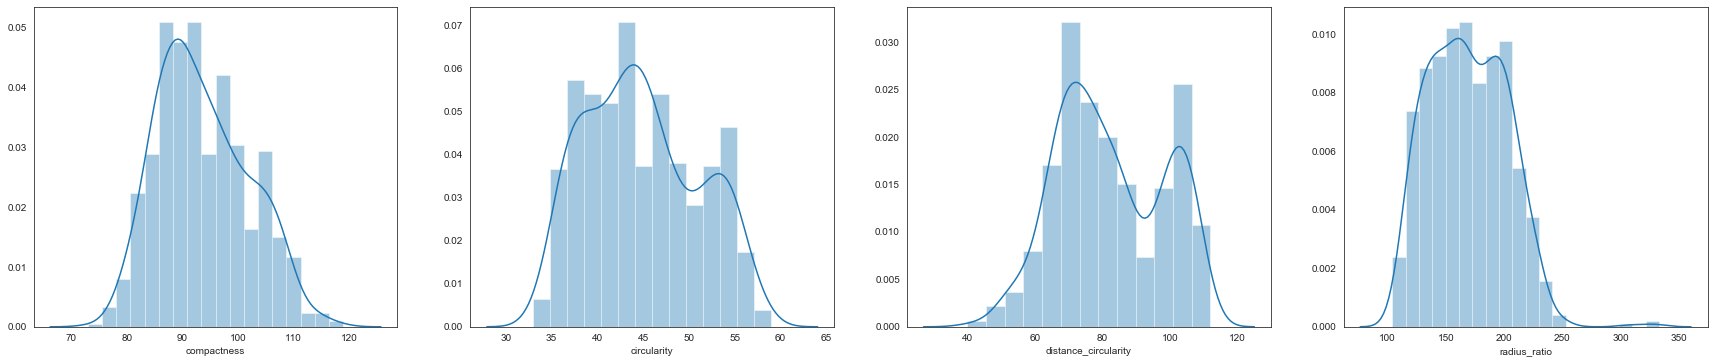

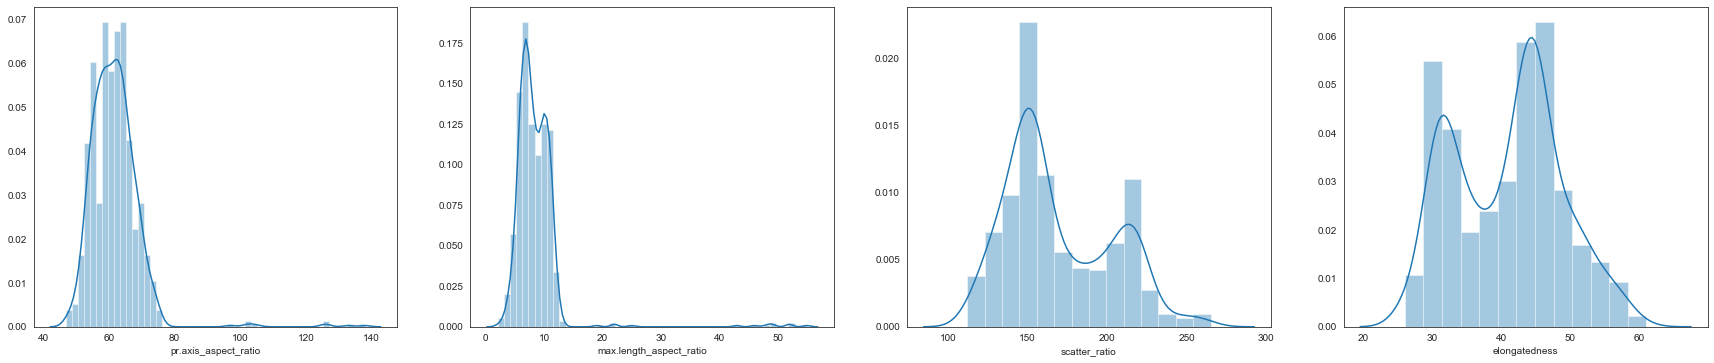

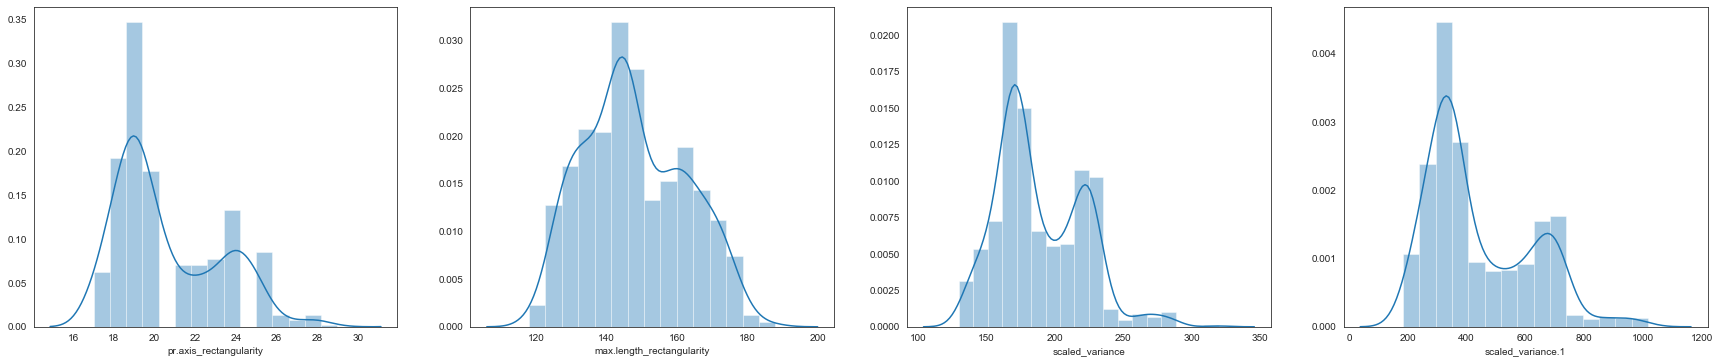

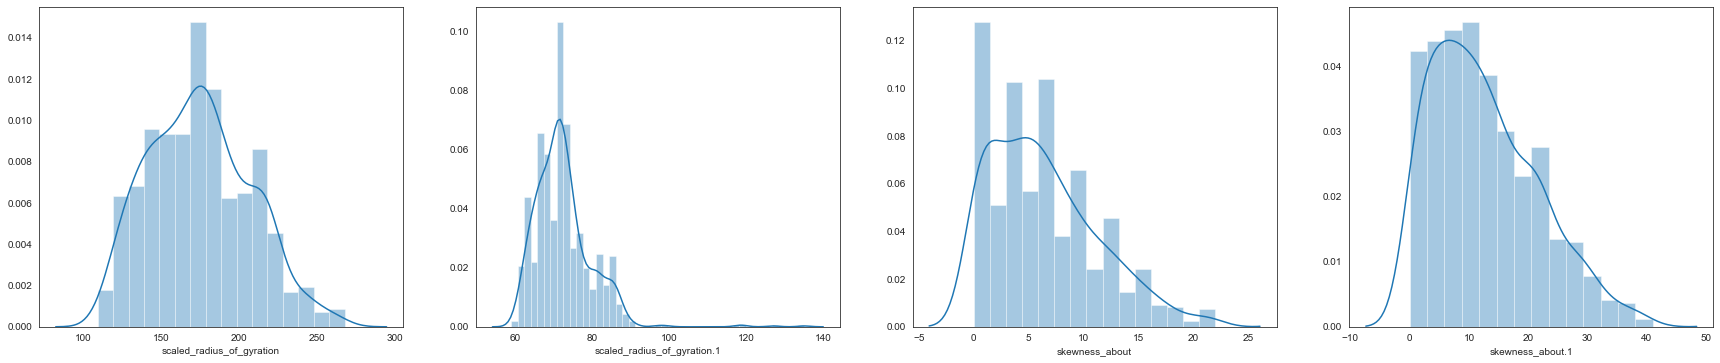

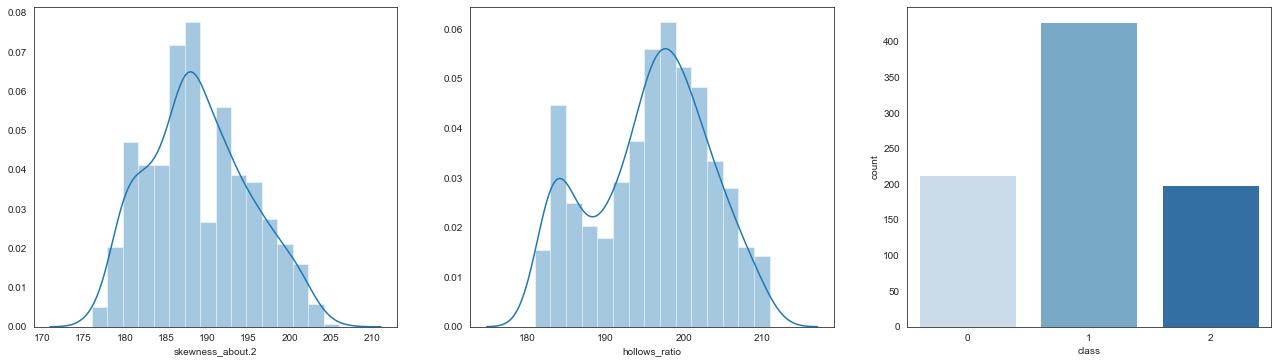

In [220]:
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize= (30,20))  # Set the figure size
        
    plt.subplot(3, 4, pos)   # plot grid
    if feature != 'class':   # Plot histogram for all the continuous columns
        sns.distplot(data[feature], kde= True )
    else:
        sns.countplot(data[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
    
    pos += 1  # to plot over the grid one by one  
    if pos > 4:
        pos = 1

In [221]:
peak_ponts = {
    'circularity': 'Total 2 peaks.',
    'distance_circularity': 'Total 2 peaks.',
    'radius_ratio': 'Total 2 peaks.',
    'max.length_aspect_ratio':  'Total 2 peaks.',
    'scatter_ratio':  'Total 2 peaks.',
    'pr.axis_rectangularity':  'Total 2 peaks.',
    'scaled_variance':  'Total 2 peaks.',
    'scaled_variance.1':  'Total 2 peaks.',
    'hollows_ratio':  'Total 2 peaks.',
}

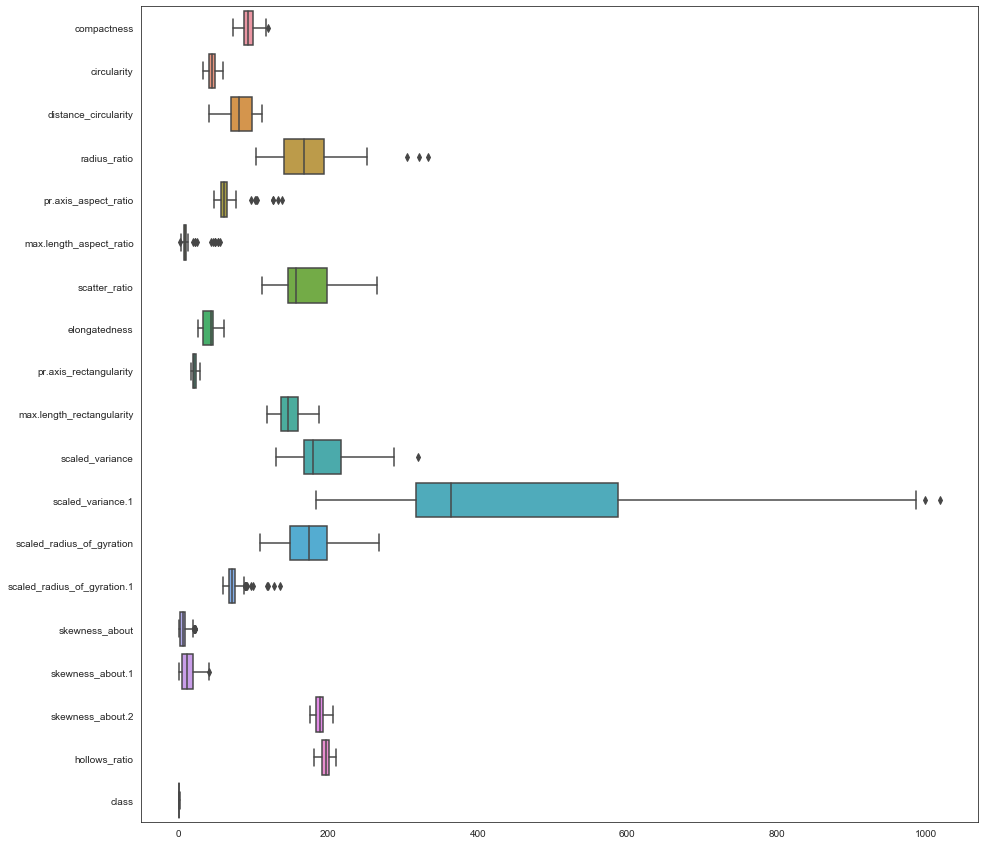

In [222]:
plt.figure(figsize=(15,15))
sns.boxplot(data=data, orient='h')

- There are outliers in columns - compactness, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1

In [223]:
# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the right tail of the distribution.
# skewness < 0 : more weight in the left tail of the distribution.

for col in data.columns:
    skewness = skew(data[col])
#     peaks, _ = find_peaks(data[col], height=7)
    label = ''
    if skewness == 0:
        label = 'Normally distributed.'
    elif skewness > 0:
        label = 'More weight in the right tail of the distribution.' # right skewed
    elif skewness < 0:
        label = 'More weight in the left tail of the distribution.' # left skewed
        
    if col in peak_ponts:
        peak_label = peak_ponts[col]
    else:
        peak_label = ''
    print(f'- Skewness of {col} is {skewness}. {label} { peak_label } \n')

- Skewness of compactness is 0.37748689633545085. More weight in the right tail of the distribution.  

- Skewness of circularity is 0.26386502615046775. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of distance_circularity is 0.10645901446099797. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of radius_ratio is 0.39900595429590474. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of pr.axis_aspect_ratio is 3.8245003565724494. More weight in the right tail of the distribution.  

- Skewness of max.length_aspect_ratio is 6.746159664978879. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of scatter_ratio is 0.6038793669729973. More weight in the right tail of the distribution. Total 2 peaks. 

- Skewness of elongatedness is 0.046381595773453826. More weight in the right tail of the distribution.  

- Skewness of pr.axis_rectangularity is 0.7714611267169009. More w

#### Multivariate analysis

(19.0, 0.0)

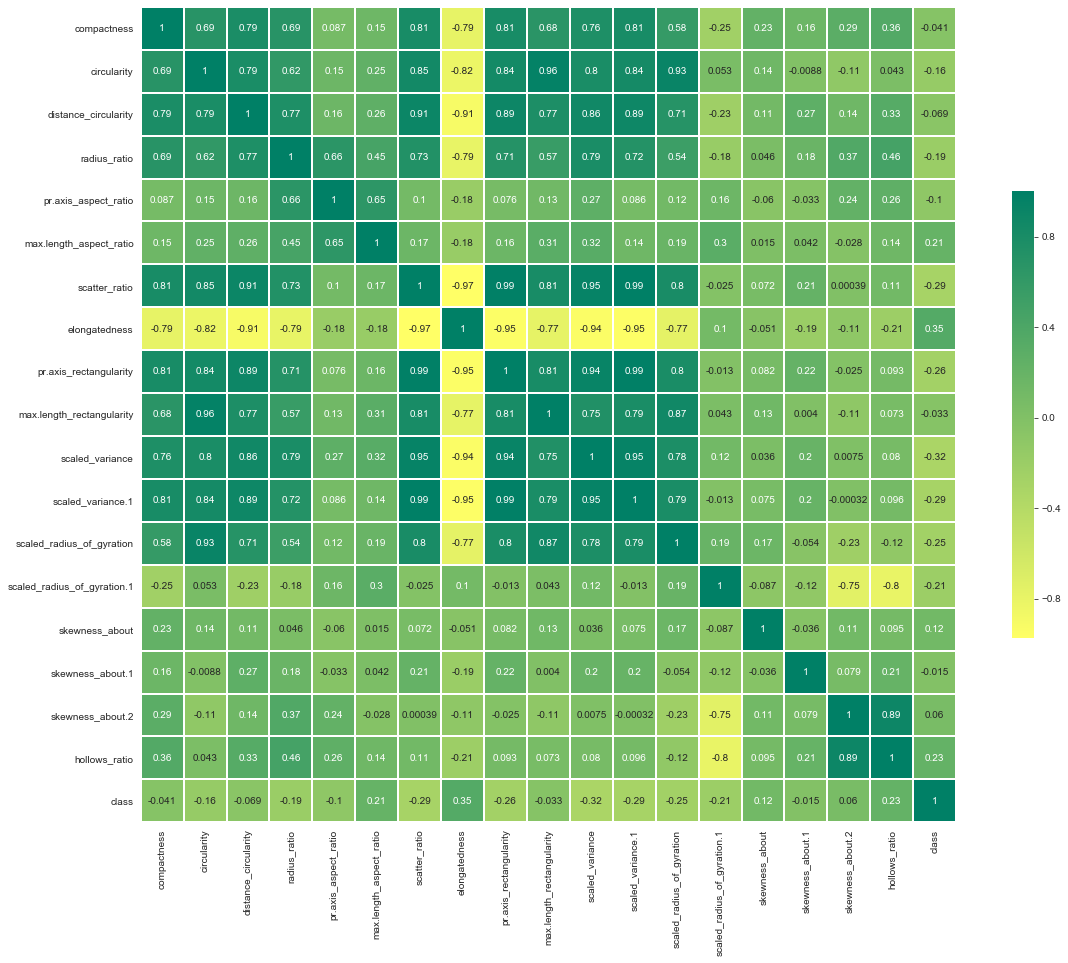

In [224]:
plt.figure(figsize = (20,15))
sns.set_style(style = 'white')
g = sns.heatmap(data.corr(), annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

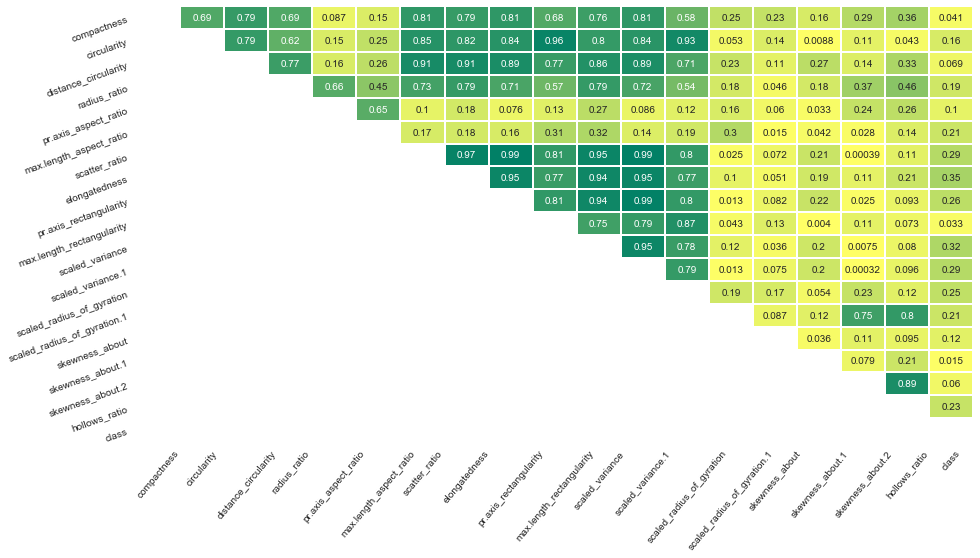

We can drop ['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1'] 



In [225]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

mask = upper == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
g = sns.heatmap(upper, center=0.5, cmap= 'summer_r', annot= True, xticklabels = corr_matrix.index, 
                yticklabels = corr_matrix.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f'We can drop {to_drop} \n')

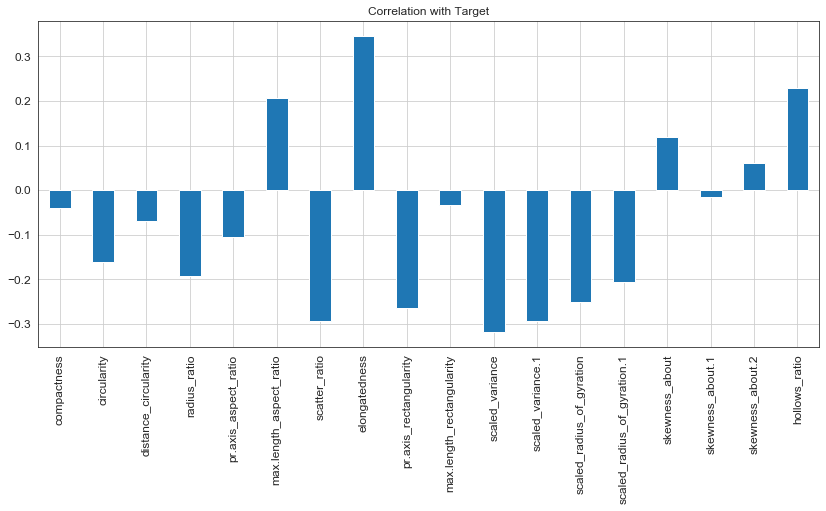

In [226]:
# Correlation with Target
predictors = data.drop('class', axis=1)
predictors.corrwith(data['class']).plot.bar(figsize = (14, 6), title = "Correlation with Target", fontsize = 12, grid = True)

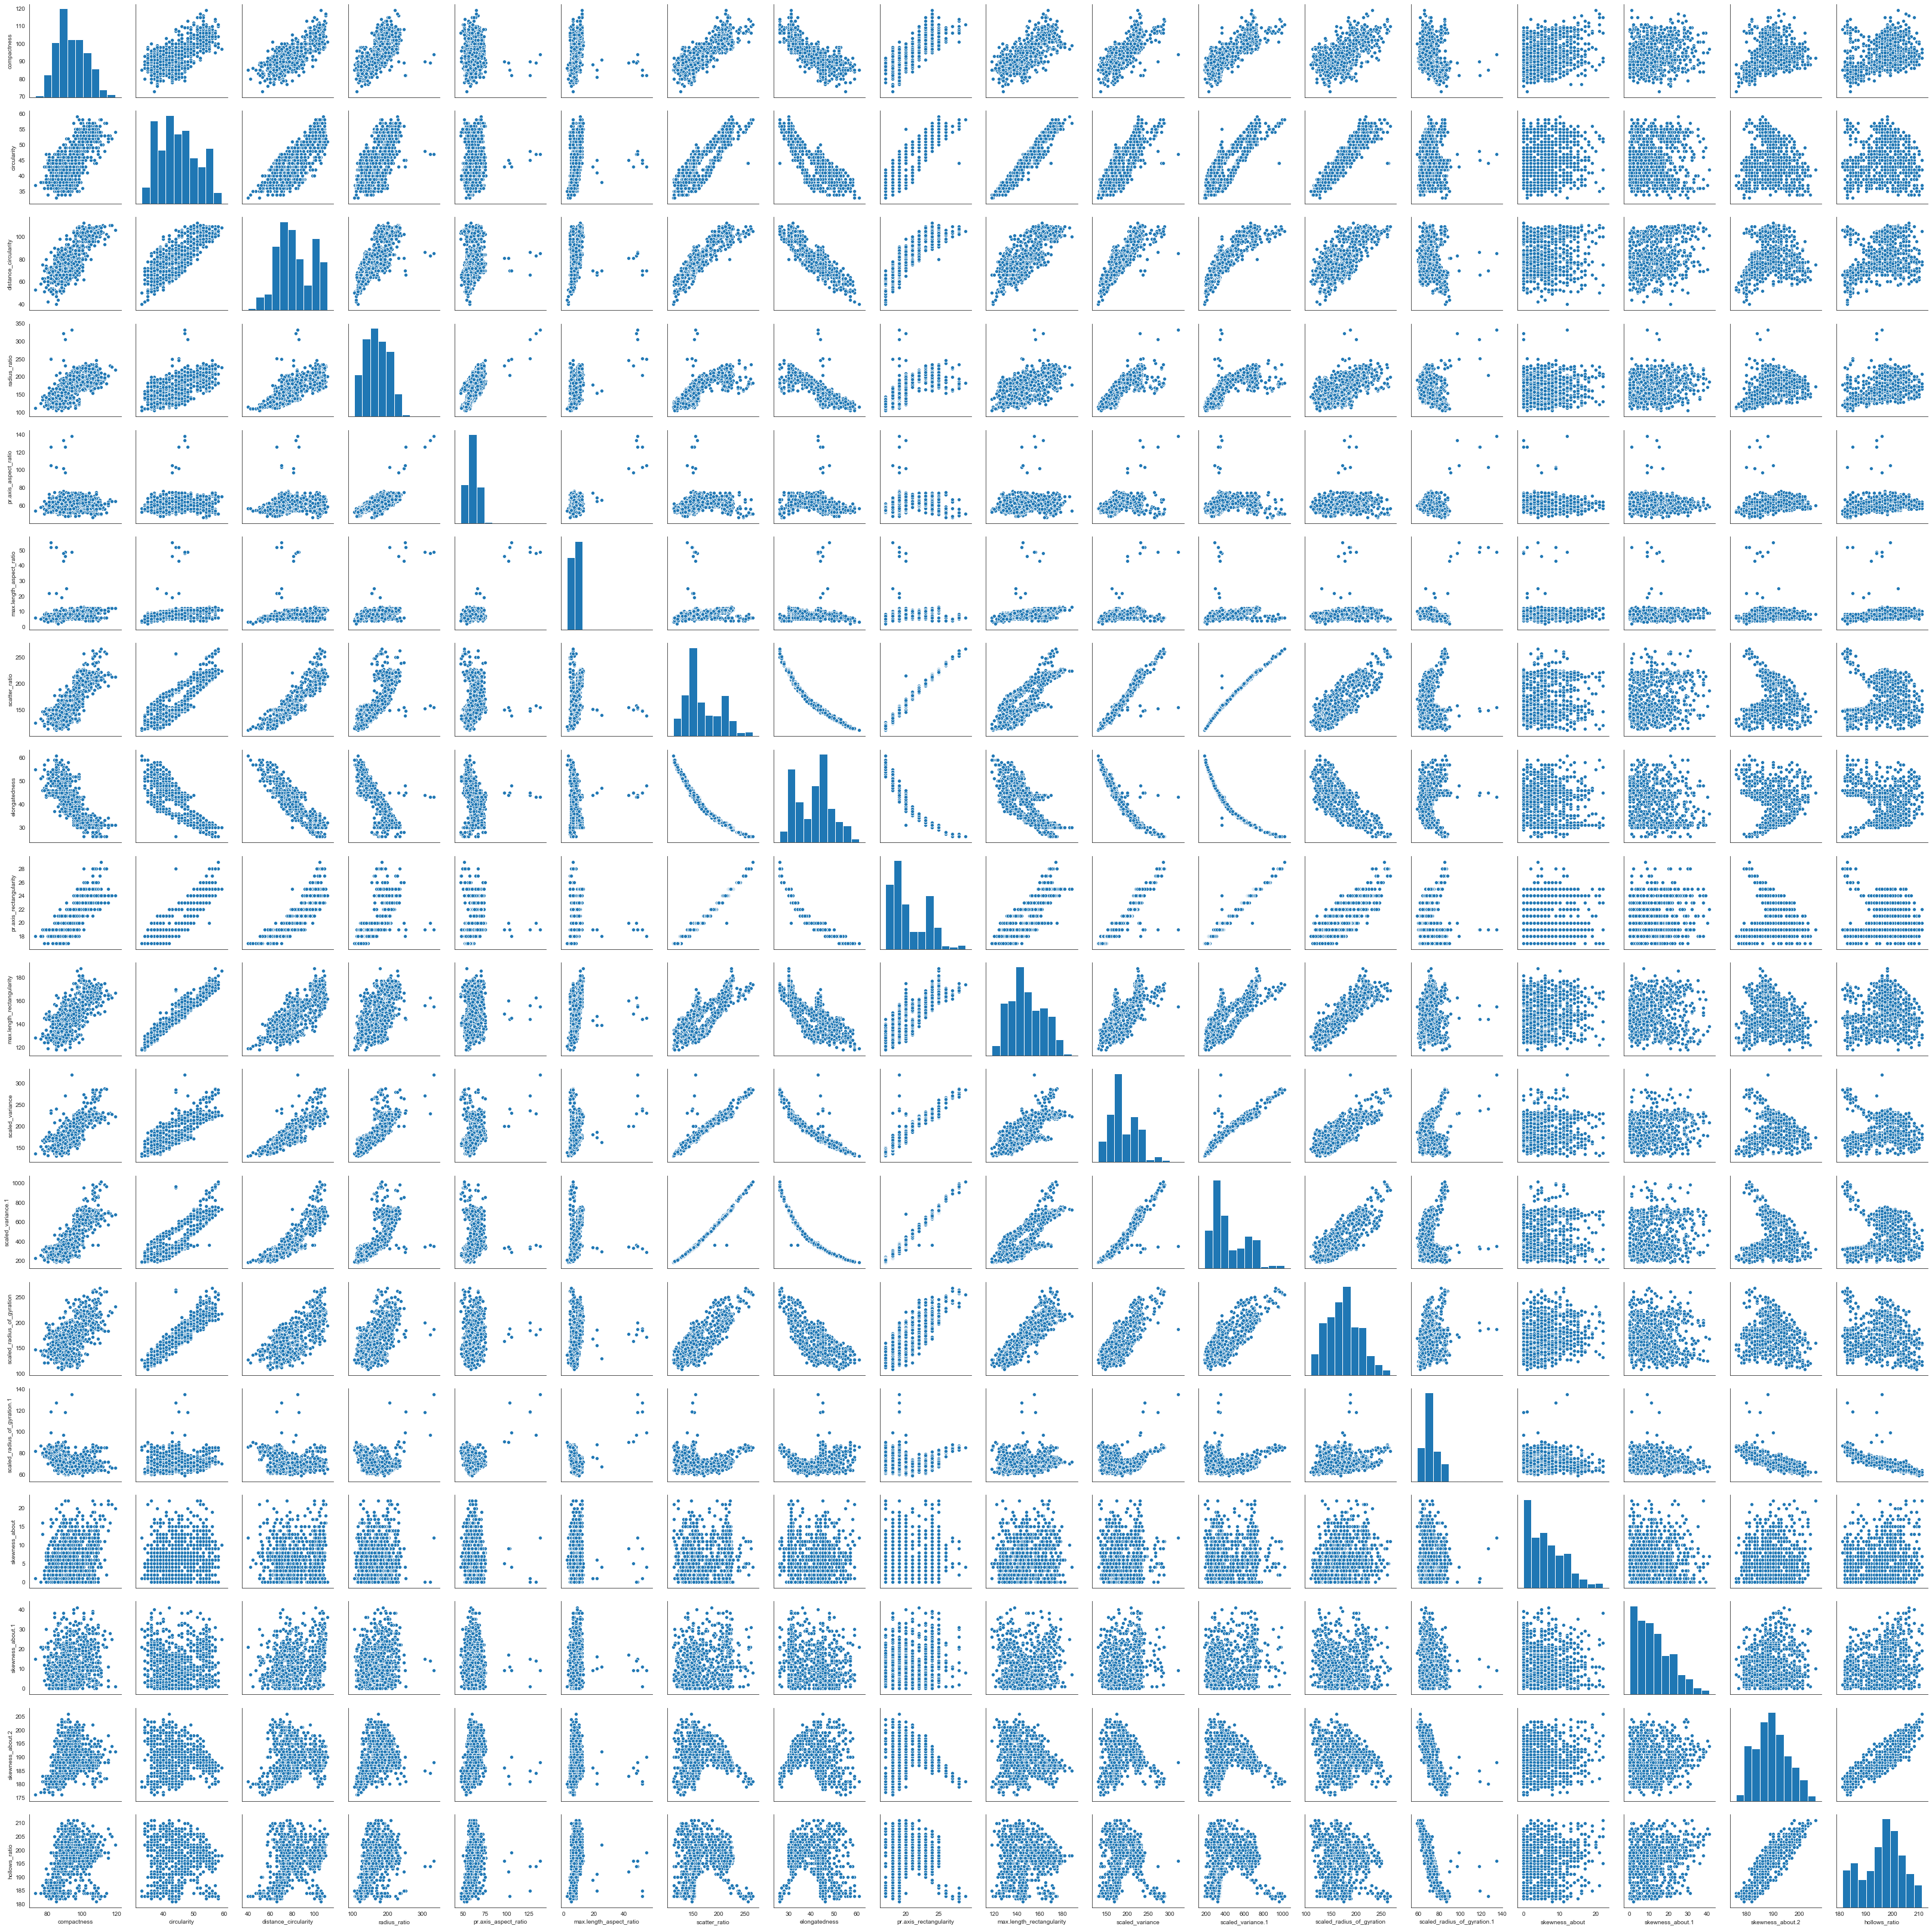

In [227]:
sns.pairplot(data.drop('class', axis=1))

- Many columns have long tails indicating outliers
- Scatter ratio & Scaled_variance1 has almost perfect positive linear relationship
- Many features shows higher correlation which indicates that we need to drop multiple features. We will use PCA for the same.

### 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [228]:
# independant variables
X = data.drop(['class'], axis=1)
XScaled = StandardScaler().fit_transform(X)

# the dependent variable
y = data['class']

In [229]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(XScaled,y, random_state = 1, stratify = y, test_size=0.30)

In [230]:
print(f'Shape of train data set: {X_train.shape}')
print(f'Shape of test data set: {X_test.shape}')

Shape of train data set: (587, 18)
Shape of test data set: (252, 18)


### 4. Train a Support vector machine using the train set and get the accuracy on the test set 

In [231]:
clf = svm.SVC(gamma=0.025, C=3, kernel='rbf')

In [232]:
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [233]:
y_pred = clf.predict(X_test)

In [234]:
svc_score = clf.score(X_test, y_test)

print(f'SVM accuracy: {svc_score}')

SVM accuracy: 0.9722222222222222


In [235]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[ 62   1   0]
 [  0 126   3]
 [  2   1  57]]


### 5. Perform K-fold cross validation and get the cross validation score of the model

In [236]:
clf1 = svm.SVC(gamma=0.025, C=3, kernel='rbf')

kfold = KFold(n_splits=10, random_state=1)

svc_cross_val_score = model_selection.cross_val_score(clf1, XScaled, y, cv=kfold, scoring='accuracy')

print(svc_cross_val_score)

svc_cross_val_score_avg = round(svc_cross_val_score.mean() * 100.0, 2)
svc_cross_val_score_std = round(svc_cross_val_score.std() * 100.0, 2)
print(f"\nCross validation accuracy is { svc_cross_val_score_avg }%. Stdanard deviation is { svc_cross_val_score_std }%")

[0.95238095 0.97619048 0.96428571 1.         0.97619048 0.97619048
 0.98809524 0.96428571 0.96428571 0.97590361]

Cross validation accuracy is 97.38%. Stdanard deviation is 1.28%


### 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [237]:
pca = PCA()
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

And the percentage of variation explained by each eigen Vector

In [238]:
print(pca.explained_variance_ratio_)

[5.21728287e-01 1.67312048e-01 1.06006605e-01 6.55792330e-02
 5.08159395e-02 3.00483129e-02 1.99669065e-02 1.23630876e-02
 8.90054223e-03 5.12189609e-03 3.57983696e-03 2.52024491e-03
 1.98332910e-03 1.44178030e-03 1.13710816e-03 8.59979848e-04
 5.44126132e-04 9.07371334e-05]


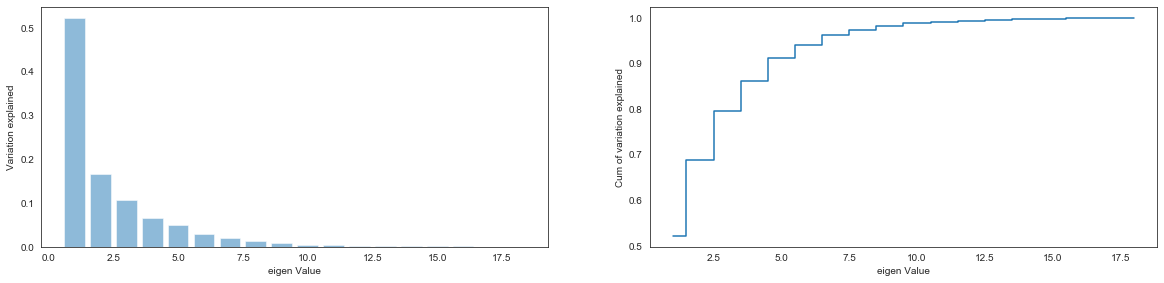

In [239]:
plt.figure(figsize= (20,15))

plt.subplot(3, 2, 1)
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')

plt.subplot(3, 2, 2)
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Dimensionality Reduction

Now 11 dimensions seems very reasonable. With 11 variables we can explain over 99% of the variation in the original data!

In [240]:
pca2 = PCA(n_components=11)
pca2.fit(XScaled)
print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(XScaled)

[0.52172829 0.16731205 0.1060066  0.06557923 0.05081594 0.03004831
 0.01996691 0.01236309 0.00890054 0.0051219  0.00357984]


In [241]:
sum(pca2.explained_variance_ratio_)

0.9914226944129955

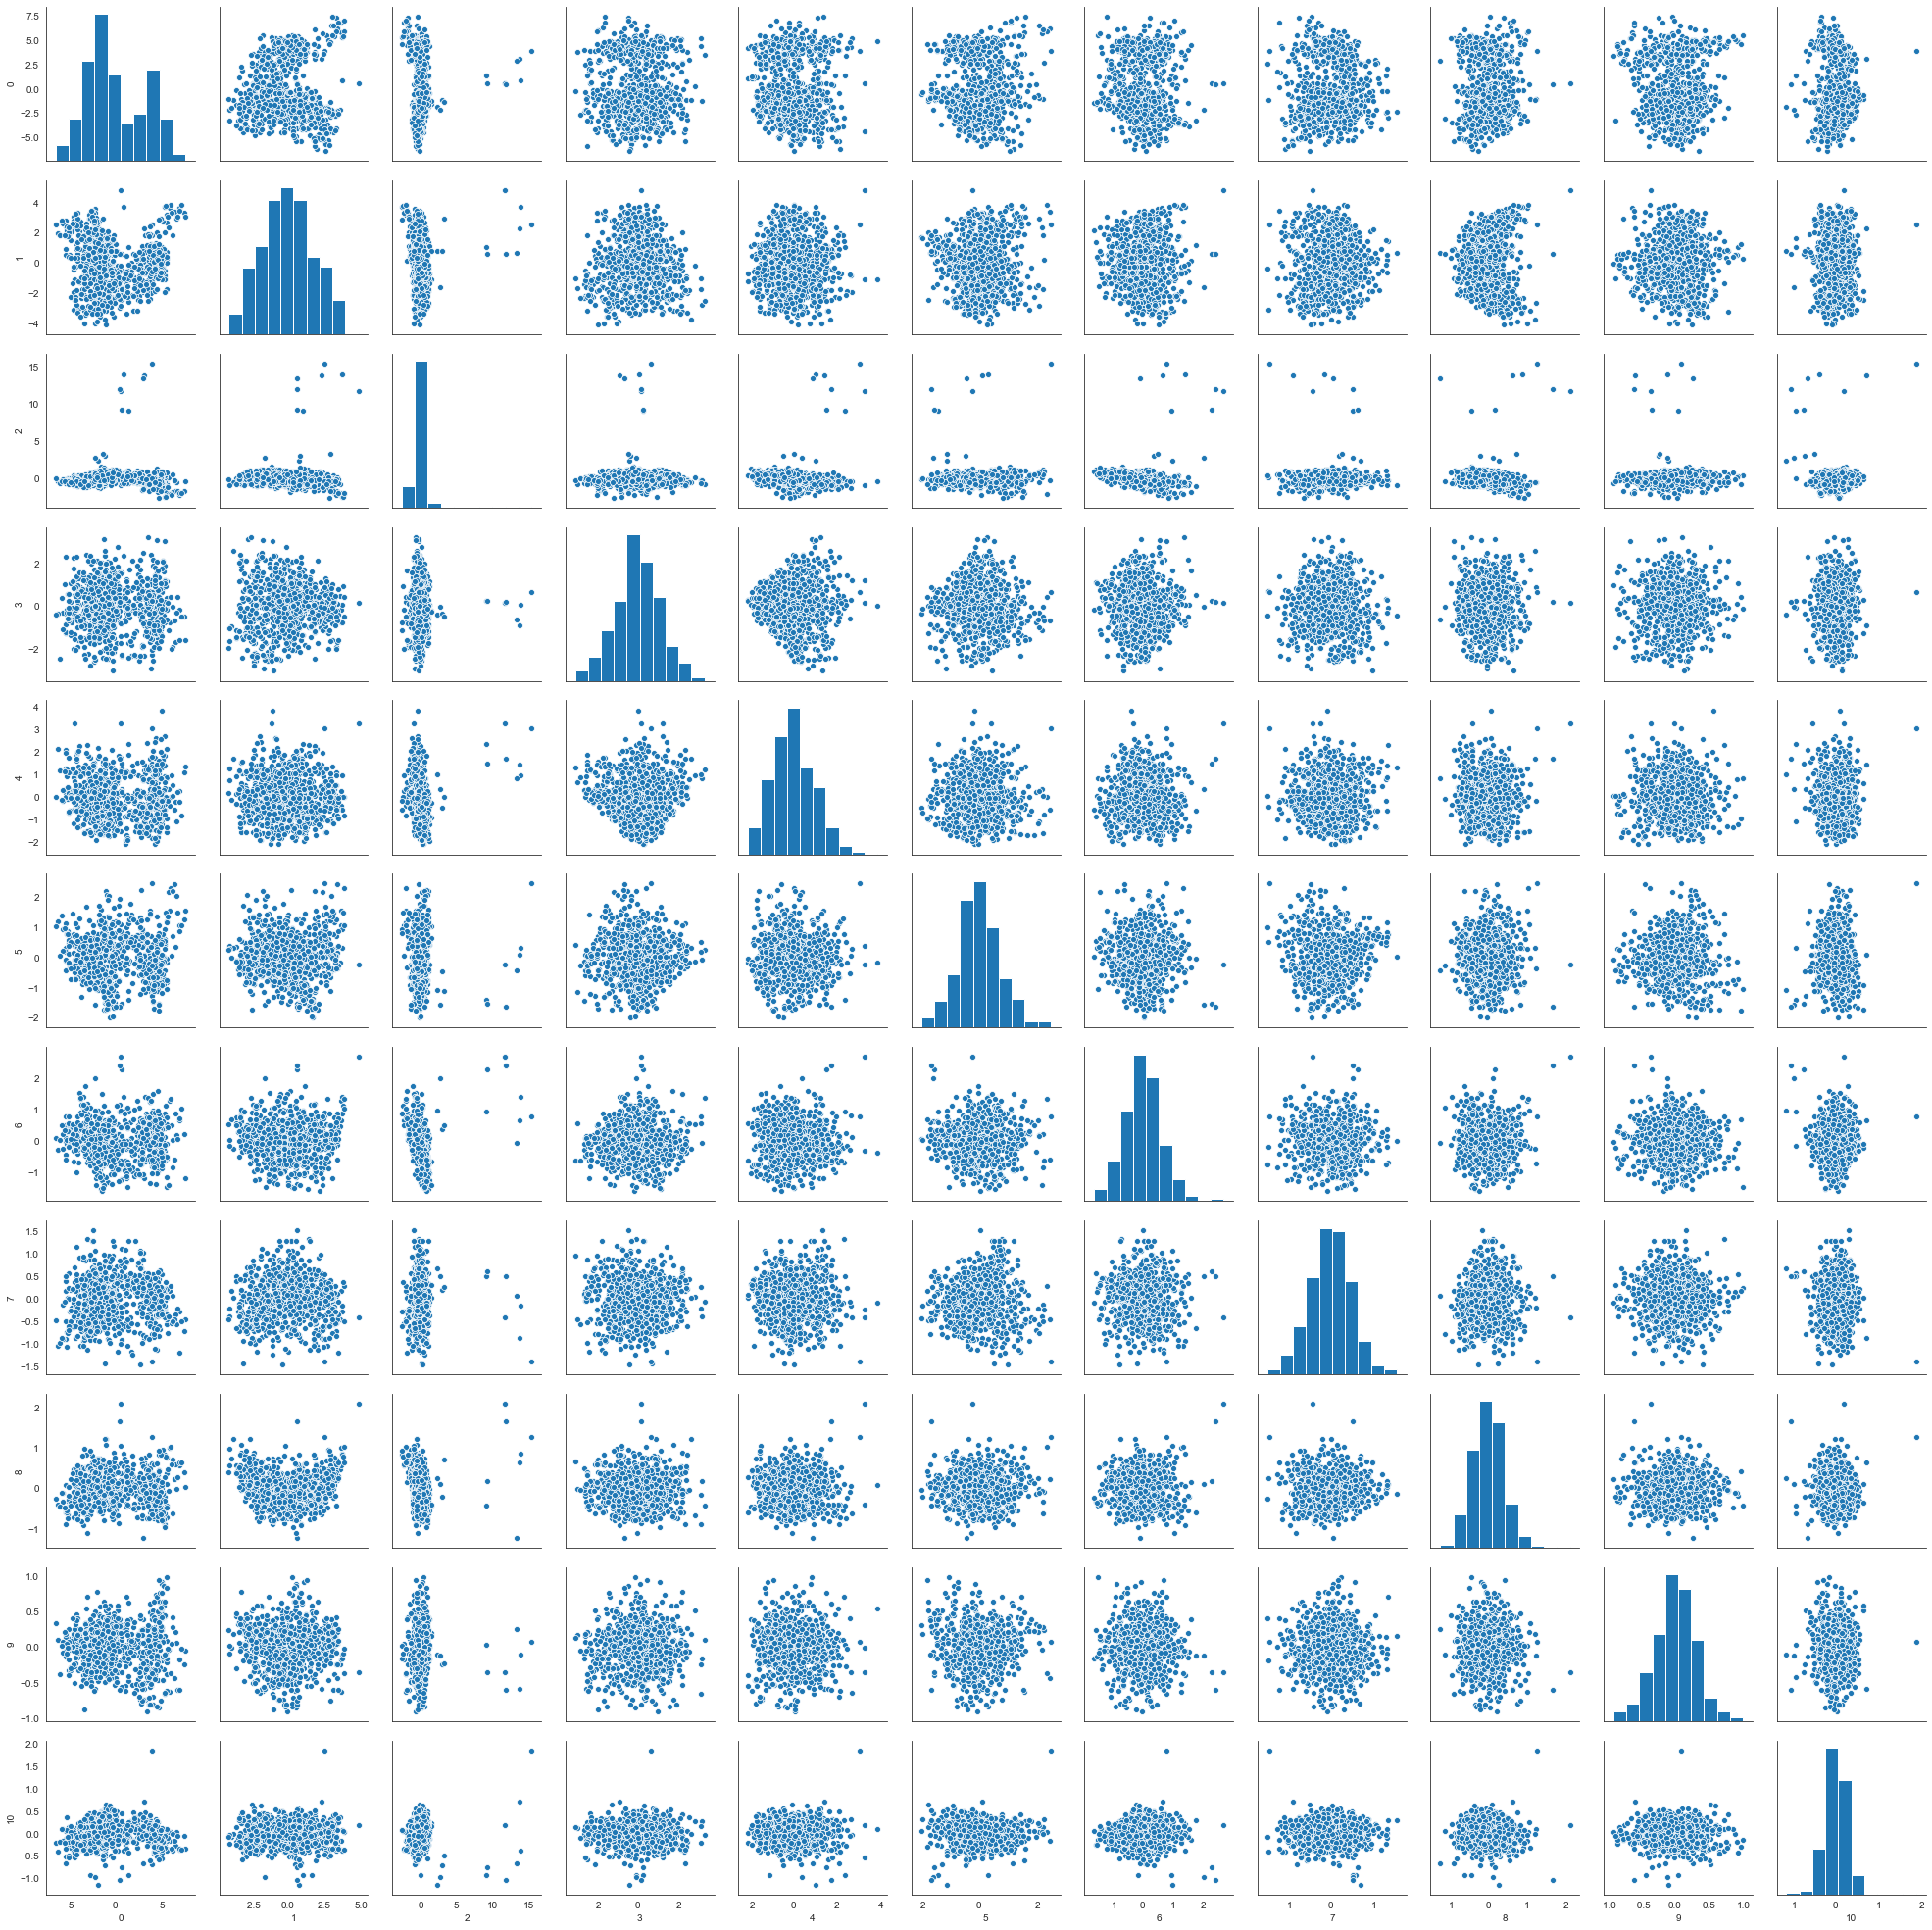

In [242]:
sns.pairplot(pd.DataFrame(Xpca2))

### 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier.

3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [243]:
# Split PCA data into test and train
X_train, X_test, y_train, y_test = train_test_split(Xpca2,y, random_state = 1, stratify = y, test_size=0.30)

In [244]:
print(f'Shape of train data set: {X_train.shape}')
print(f'Shape of test data set: {X_test.shape}')

Shape of train data set: (587, 11)
Shape of test data set: (252, 11)


4. Train a Support vector machine using the train set and get the accuracy on the test set 

In [245]:
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [246]:
pca_svc_score = clf.score(X_test, y_test)

print(f'SVM accuracy after PCA: {pca_svc_score}')

SVM accuracy after PCA: 0.9603174603174603


In [247]:
y_pred = clf.predict(X_test)

In [248]:
print("Confusion Matrix:\n",metrics.confusion_matrix(y_pred,y_test))

Confusion Matrix:
 [[ 61   2   0]
 [  0 124   3]
 [  3   2  57]]


5. Perform K-fold cross validation and get the cross validation score of the model

In [249]:
clf1 = svm.SVC(gamma=0.025, C=3, kernel='rbf')

kfold = KFold(n_splits=10, random_state=1)

pca_svc_cross_val_score = model_selection.cross_val_score(clf1, Xpca2, y, cv=kfold, scoring='accuracy')

print(pca_svc_cross_val_score)

pca_svc_cross_val_score_avg = round(pca_svc_cross_val_score.mean() * 100.0, 2)
pca_svc_cross_val_score_std = round(pca_svc_cross_val_score.std() * 100.0, 2)
print(f"\nCross validation accuracy is {pca_svc_cross_val_score_avg}%. Stdanard deviation is {pca_svc_cross_val_score_std}%")

[0.95238095 0.97619048 0.96428571 0.98809524 0.97619048 0.97619048
 0.97619048 0.95238095 0.95238095 0.97590361]

Cross validation accuracy is 96.9%. Stdanard deviation is 1.21%


### 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings 

In [250]:
print(f'\nSVM score: { round(svc_score * 100.0, 2)}%')
print(f"Cross validation accuracy is { svc_cross_val_score_avg }%. Stdanard deviation is { svc_cross_val_score_std }%")

print(f'\nSVM Score after PCA: {round(pca_svc_score * 100.0, 2)}%')
print(f"Cross validation accuracy is { pca_svc_cross_val_score_avg }%. Stdanard deviation is { pca_svc_cross_val_score_std }%")


SVM score: 97.22%
Cross validation accuracy is 97.38%. Stdanard deviation is 1.28%

SVM Score after PCA: 96.03%
Cross validation accuracy is 96.9%. Stdanard deviation is 1.21%


Looks like by drop reducing dimensionality by 7, we only dropped around 1% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 11 independent variables is likely to do better since that would be less of an over-fit.